<a href="https://colab.research.google.com/github/les8182377/Machinelearning/blob/master/TensorFlow/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction)>0:
            title+= ',predict=' + str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([])#hide the ticks
        ax.set_yticks([])
        idx+=1
    plt.show()

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def show_Predicted_Probability(y, prediction,X_img_test, Predicted_Probability, i):
    label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] +
              'Probability:%1.9f'%(Predicted_Probability[i][j]))



In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn import preprocessing
np.random.seed(10)

def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    X_onehot_df = pd.get_dummies(data=df, columns=['embarked'])
    
    ndarray = X_onehot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    return scaledFeatures, Label

all_df = pd.read_excel('drive/My Drive/Colab Notebooks/data/titanic3.xls')

cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

print('total:', len(all_df),
      'train:', len(train_df),
      'test:', len(test_df))

train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(units=40, input_dim=9,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dense(units=30,
               kernel_initializer='uniform',
               activation='relu'))

model.add(Dense(units=1,
               kernel_initializer='uniform',
               activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam', metrics=['accuracy'])

print(train_Features.dtype)
print((train_Label.dtype))
print(train_Features.shape)
print(train_Label.shape)

train_history = model.fit(x=train_Features,
                          y=train_Label,
                          validation_split=0.1,
                          epochs=30,
                          batch_size=30,verbose=2)


total: 1309 train: 1034 test: 275
float64
float64
(1034, 9)
(1034,)
Epoch 1/30
31/31 - 0s - loss: 0.6897 - accuracy: 0.5817 - val_loss: 0.6751 - val_accuracy: 0.7885
Epoch 2/30
31/31 - 0s - loss: 0.6694 - accuracy: 0.6484 - val_loss: 0.6111 - val_accuracy: 0.8173
Epoch 3/30
31/31 - 0s - loss: 0.6055 - accuracy: 0.7215 - val_loss: 0.5100 - val_accuracy: 0.8077
Epoch 4/30
31/31 - 0s - loss: 0.5291 - accuracy: 0.7613 - val_loss: 0.4686 - val_accuracy: 0.7885
Epoch 5/30
31/31 - 0s - loss: 0.4904 - accuracy: 0.7667 - val_loss: 0.4395 - val_accuracy: 0.7596
Epoch 6/30
31/31 - 0s - loss: 0.4830 - accuracy: 0.7624 - val_loss: 0.4448 - val_accuracy: 0.7885
Epoch 7/30
31/31 - 0s - loss: 0.4789 - accuracy: 0.7591 - val_loss: 0.4549 - val_accuracy: 0.7885
Epoch 8/30
31/31 - 0s - loss: 0.4727 - accuracy: 0.7570 - val_loss: 0.4289 - val_accuracy: 0.7885
Epoch 9/30
31/31 - 0s - loss: 0.4728 - accuracy: 0.7785 - val_loss: 0.4422 - val_accuracy: 0.7981
Epoch 10/30
31/31 - 0s - loss: 0.4709 - accuracy: 

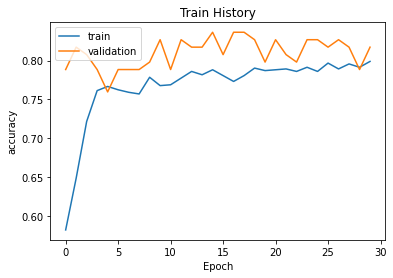

9/9 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8145


In [16]:

show_train_history(train_history, 'accuracy', 'val_accuracy')

scores = model.evaluate(x=test_Features,
                        y=test_Label)

scores[1]

Jack = pd.Series([0 ,'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])

JR_df = pd.DataFrame([list(Jack), list(Rose)], columns=['survived', 'name', 'pclass', 'sex', 
                                                        'age', 'sibsp', 'parch', 'fare', 'embarked'])


In [17]:
all_df = pd.concat([all_df, JR_df])


In [18]:
all_df[-2:]


,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [19]:
all_Features, Label = PreprocessData(all_df)

all_probability = model.predict(all_Features)

In [20]:
all_probability[:10]

array([[0.97284913],
       [0.5278278 ],
       [0.9720155 ],
       [0.3525042 ],
       [0.96789885],
       [0.25762862],
       [0.93970996],
       [0.2940402 ],
       [0.9396783 ],
       [0.29570255]], dtype=float32)

In [21]:
pd = all_df


In [23]:
pd[-2:]


,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S
